In [1]:
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
IMAGE_SIZE = 224
CHANNELS = 3

from keras_preprocessing.image import ImageDataGenerator

In [3]:
TRAINING_DIR = "Fold1\Fold1\Fold1/Train" # path to training set
training_datagen = ImageDataGenerator(                # here apply some real time augmentations to images
      rescale = 1./255,                               #sclale the size of image between 0-1
	  rotation_range=40,                              # rotated in range 0-40
      width_shift_range=0.2,                          #width shift
      height_shift_range=0.2,                         #height shift
      shear_range=0.2,
      zoom_range=0.2,                                 #zoom image 
      horizontal_flip=True,
      fill_mode='nearest')                            #fill the rest with nearest pixel

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (IMAGE_SIZE,IMAGE_SIZE),                    #image resized to 224x224px
    class_mode = 'binary',                                   #2D one hot encoded
    batch_size=10
)

Found 2142 images belonging to 2 classes.


In [4]:
VALIDATION_DIR = "Fold1\Fold1\Fold1/Val"  #path to validation set
validation_datagen = ImageDataGenerator(rescale = 1./255)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size = (IMAGE_SIZE,IMAGE_SIZE),
    class_mode = 'binary'
)

Found 420 images belonging to 2 classes.


In [5]:
TEST_DIR = "Fold1\Fold1\Fold1/Test"
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        TEST_DIR,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="binary"
)

Found 45 images belonging to 2 classes.


In [6]:
print(test_generator.class_indices)
class_names = list(train_generator.class_indices.keys())

{'Monkeypox': 0, 'Others': 1}


In [24]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2

model = tf.keras.models.Sequential([
    keras.layers.InputLayer(input_shape=input_shape),
    keras.layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(2, activation='softmax'),
])

In [25]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [11]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()

In [26]:
history = model.fit(
    train_generator,
    batch_size=32,
    validation_data=validation_generator,
    verbose=1,
    epochs=20,
    callbacks=[early_stopping]
)

Epoch 1/20


ValueError: in user code:

    File "c:\Users\ASUS\AppData\Local\Programs\Python\Python310\PythonVEnv\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\ASUS\AppData\Local\Programs\Python\Python310\PythonVEnv\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\ASUS\AppData\Local\Programs\Python\Python310\PythonVEnv\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\ASUS\AppData\Local\Programs\Python\Python310\PythonVEnv\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\ASUS\AppData\Local\Programs\Python\Python310\PythonVEnv\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "c:\Users\ASUS\AppData\Local\Programs\Python\Python310\PythonVEnv\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\ASUS\AppData\Local\Programs\Python\Python310\PythonVEnv\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\ASUS\AppData\Local\Programs\Python\Python310\PythonVEnv\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\ASUS\AppData\Local\Programs\Python\Python310\PythonVEnv\lib\site-packages\keras\losses.py", line 2162, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "c:\Users\ASUS\AppData\Local\Programs\Python\Python310\PythonVEnv\lib\site-packages\keras\backend.py", line 5677, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 2) vs (None, 1)).


In [13]:
loss = history.history['loss']
accuracy= history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

ValueError: x and y must have same first dimension, but have shapes (20,) and (2,)

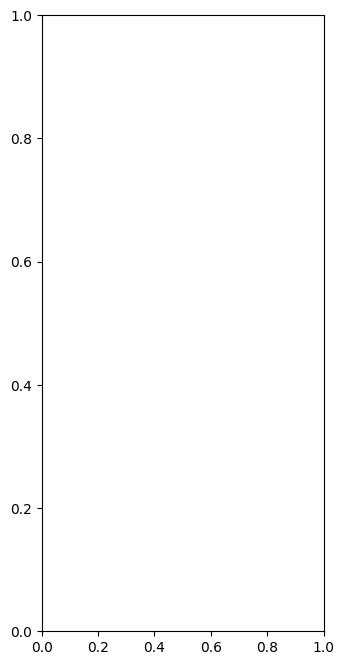

In [14]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), accuracy, label='Training Accuracy')
plt.plot(range(EPOCHS), val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Others
1/1 [==============================] - 0s 227ms/step
predicted label: Monkeypox


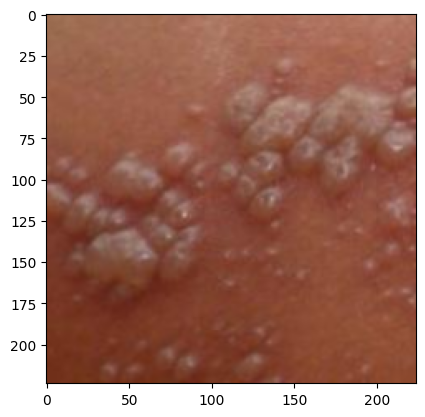

In [23]:
for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [ ]:
model.save("MokeyPox_model.h5")